In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Aaryant31/linearRegression-Practice/main/Advertising.csv")

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Train | Validation | Test Split Procedure 

This is often also called a "hold-out" set, since you should not adjust parameters based on the final test set, but instead use it *only* for reporting final expected performance.

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Validation/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Eval Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Evaluation Data (by creating predictions and comparing to Y_eval)
7. Adjust Parameters as Necessary and repeat steps 5 and 6
8. Get final metrics on Test set (not allowed to go back and adjust after this!)

In [6]:
X=df.drop('sales',axis=1)

In [7]:
y=df.sales

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=101)

In [11]:
len(X)

200

In [12]:
len(X_train)

140

In [13]:
len(X_test)

30

In [14]:
len(X_eval)

30

# Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train=scaler.transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

In [20]:
X_eval=scaler.transform(X_eval)

##  creating model

In [21]:
from sklearn.linear_model import Ridge

In [22]:
model_one= Ridge(alpha=100)

In [23]:
model_one.fit(X_train,y_train)

Ridge(alpha=100)

In [24]:
model_one_pred=model_one.predict(X_eval)

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(y_eval,model_one_pred)

7.320101458823872

In [27]:
res1=y_eval-model_one_pred

C:\Users\Ultimatrix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


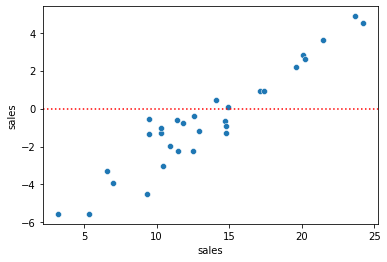

In [28]:
sns.scatterplot(y_eval,res1)
plt.axhline(y=0,ls= ':',c='r')

In [29]:
model_two= Ridge(alpha=1)

In [30]:
model_two.fit(X_train,y_train)

Ridge(alpha=1)

In [31]:
model_two_pred=model_two.predict(X_eval)

In [32]:
model_two_pred=model_two.predict(X_eval)

In [33]:
mean_squared_error(y_eval,model_two_pred)

2.3837830750569866

In [34]:
res2=y_eval-model_two_pred

C:\Users\Ultimatrix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


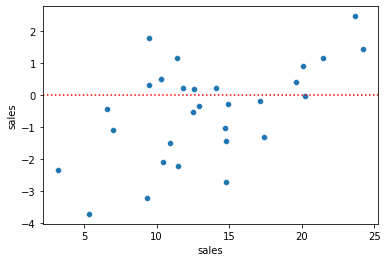

In [35]:
sns.scatterplot(y_eval,res2)
plt.axhline(y=0,ls= ':',c='r')

In [36]:
final_test_pred=model_two.predict(X_test)

In [37]:
mean_squared_error(y_test,final_test_pred)

2.254260083800517

In [38]:
final_res=y_test-final_test_pred

C:\Users\Ultimatrix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='sales'>

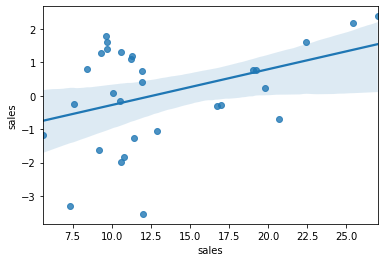

In [39]:
sns.regplot(y_test,final_res)

# Cross Val Score

In [1]:
from sklearn.model_selection import cross_val_score

In [44]:
score =cross_val_score(model_one,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [45]:
score

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [46]:
abs(score.mean())

8.215396464543607

In [51]:
score =cross_val_score(model_two,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [52]:
abs(score.mean())

3.344839296530695

In [53]:
model_two.fit(X_train,y_train)

Ridge(alpha=1)

In [55]:
model_two_pred=model_two.predict(X_test)

In [56]:
mean_squared_error(y_test,model_two_pred)

2.254260083800517